In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [13]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['Price'] = pd.Series(boston.target)

In [14]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
bos.shape

(506, 14)

In [16]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [17]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
import seaborn as sns 

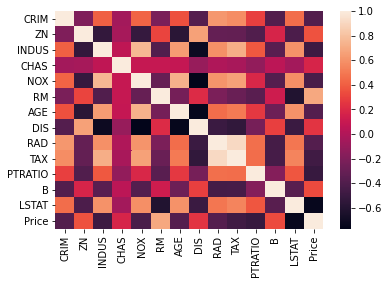

In [22]:
sns.heatmap(bos.corr())
plt.show()

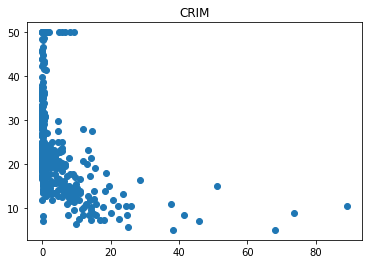

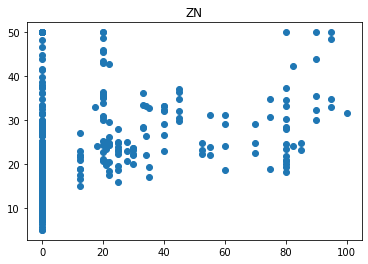

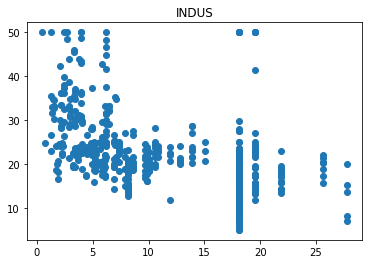

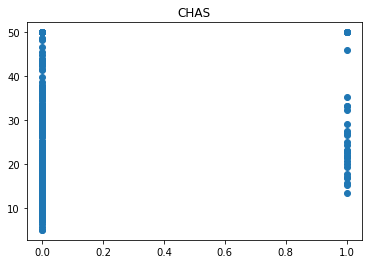

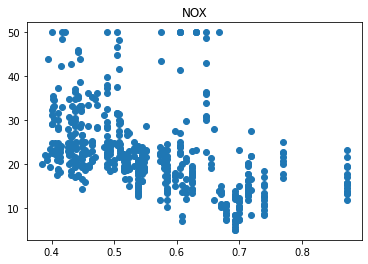

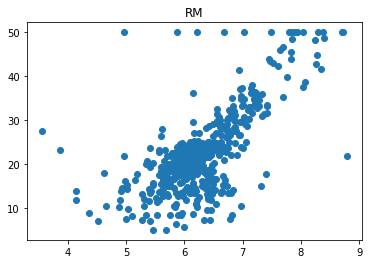

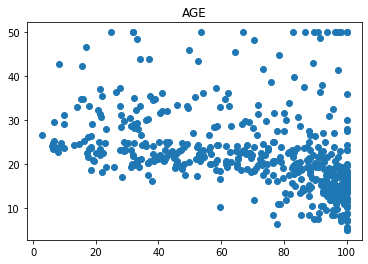

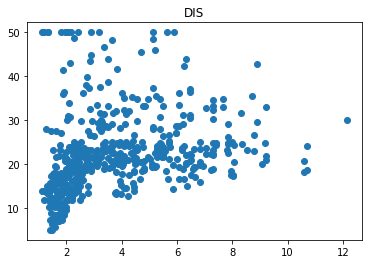

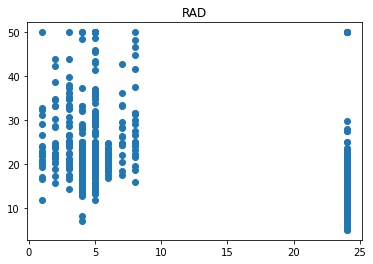

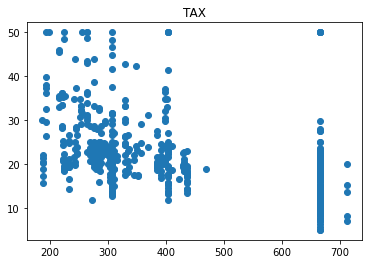

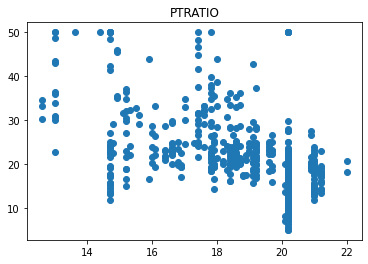

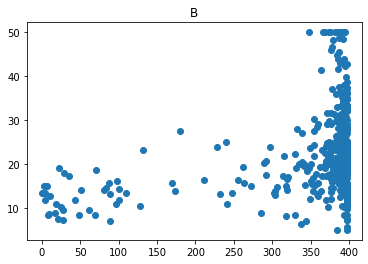

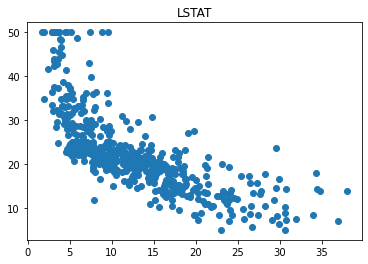

In [60]:
for i in range(bos.shape[1]-1):
    plt.scatter(x=bos.iloc[:, i],y=bos['Price'])
    plt.title(boston.feature_names[i])
    plt.show()


In [71]:
linear_df = pd.merge(bos['LSTAT'], bos['RM'],right_index = True,
               left_index = True)

In [73]:
linear_df.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [75]:
X = pd.DataFrame(linear_df, columns = ['LSTAT','RM'])
y = bos['Price']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

In [94]:
X_train.head()

,LSTAT,RM
371,9.53,6.216
254,6.57,6.108
84,9.62,6.389
396,19.37,6.405
151,13.28,5.404


In [95]:
y_train.head()

371    50.0
254    21.9
84     23.9
396    12.5
151    19.6
Name: Price, dtype: float64

In [96]:
import statsmodels.api as sm


In [97]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
print(X_train_sm)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

     const  LSTAT     RM
371    1.0   9.53  6.216
254    1.0   6.57  6.108
84     1.0   9.62  6.389
396    1.0  19.37  6.405
151    1.0  13.28  5.404
..     ...    ...    ...
350    1.0   5.98  6.490
416    1.0  25.79  6.782
201    1.0   7.43  6.162
232    1.0   2.47  8.337
255    1.0   9.25  5.876

[354 rows x 3 columns]


In [98]:
lr.params

const   -5.710950
LSTAT   -0.587630
RM       5.676332
dtype: float64

In [99]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     329.7
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           2.63e-81
Time:                        17:01:29   Log-Likelihood:                -1102.1
No. Observations:                 354   AIC:                             2210.
Df Residuals:                     351   BIC:                             2222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7109      3.870     -1.476      0.1

ValueError: x and y must be the same size

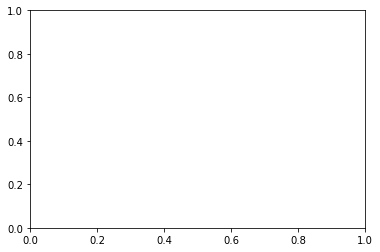

In [91]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.7287 + (-0.6616)*X_train.iloc[:, 0] + (4.6401 )*X_train.iloc[:, 1], 'r')
plt.show()

In [92]:
X_train()

TypeError: 'DataFrame' object is not callable

In [85]:
y_train

219    23.0
440    10.5
380    10.4
234    29.0
238    23.7
       ... 
237    31.5
372    50.0
217    28.7
184    26.4
361    19.9
Name: Price, Length: 354, dtype: float64